### Network Creation and Working with Grey's Anatomy

In [1]:
ga.adj = as.matrix(
    read.table("../datasets/grey/grey_adjacency.tsv", sep = '\t', quote = '\"', header=T, row.names=1)
)
head(ga.adj, 3)

,addison,adele,altman,amelia,arizona,ava,avery,bailey,ben,burton,⋯,pierce,preston,reed,sloan,steve,susan.grey,thatch.grey,torres,tucker,yang
addison,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
adele,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
altman,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,1,0,0,0,0,0,0


In [11]:
library(statnet)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

     Installed ReposVer Built  
tsna "0.3.1"   "0.3.3"  "4.0.2"


Restart R and use "statnet::update_statnet()" to get the updates.



In [12]:
grey.net.a = network(ga.adj, directed = FALSE, hyper = FALSE, loops = FALSE, multiple = FALSE, bipartite = FALSE)

In [44]:
head(network.vertex.names(grey.net.a))

[1] "addison" "adele"   "altman"  "amelia"  "arizona" "ava"

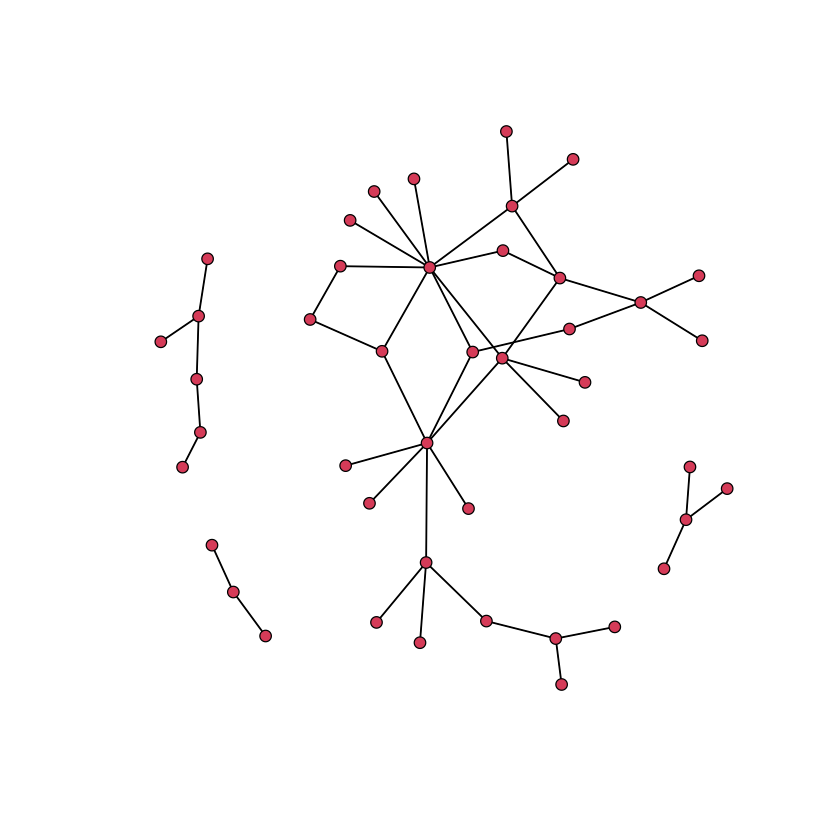

In [30]:
par(bg = "white")
plot(grey.net.a)

In [2]:
ga.atts<-read.table('../datasets/grey/grey_nodes.tsv', sep="\t", header=T, quote="\"",
                    stringsAsFactors=F, strip.white=T, as.is=T)

In [33]:
head(ga.atts, 3)

,name,sex,race,birthyear,position,season,sign
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
1,addison,F,White,1967,Attending,1,Libra
2,adele,F,Black,1949,Non-Staff,2,Leo
3,altman,F,White,1969,Attending,6,Pisces


In [34]:
grey.net<-network(ga.adj, vertex.attr=ga.atts, vertex.attrnames=colnames(ga.atts),
                  directed=F, hyper=F, loops=F, multiple=F, bipartite=F)

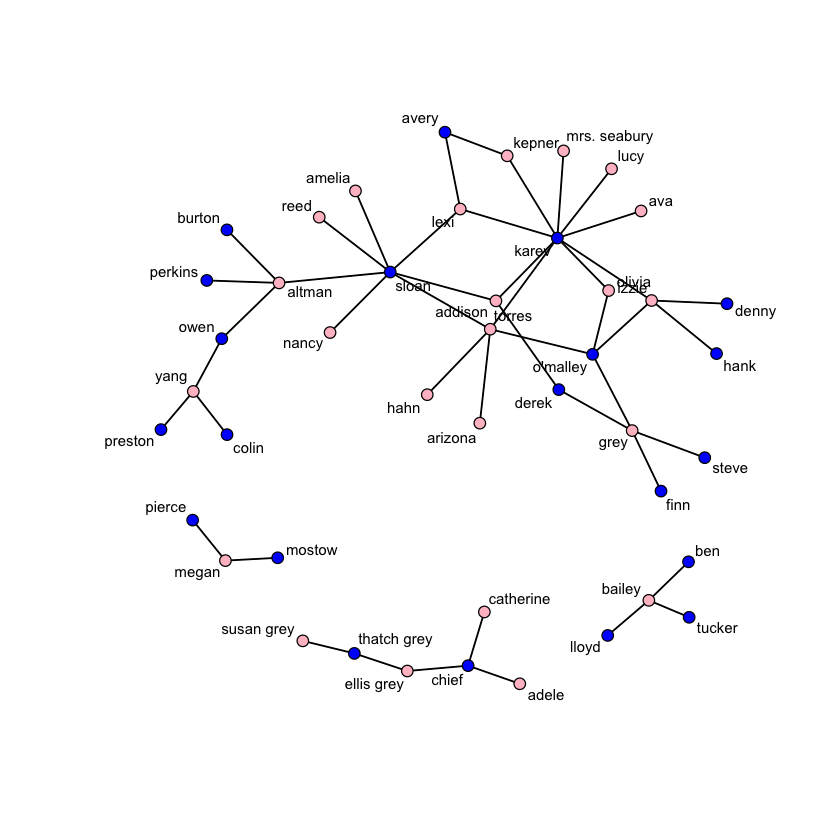

In [51]:
par(bg = "white")
plot(grey.net, vertex.col=c("blue","pink")[1 + (get.vertex.attribute(grey.net, "sex")=="F")],
     label=get.vertex.attribute(grey.net, "name"), label.cex=.75)

In [62]:
network.edgecount(grey.net) / choose(44, 2)

[1] 0.04862579

[1] 44

[1] 6

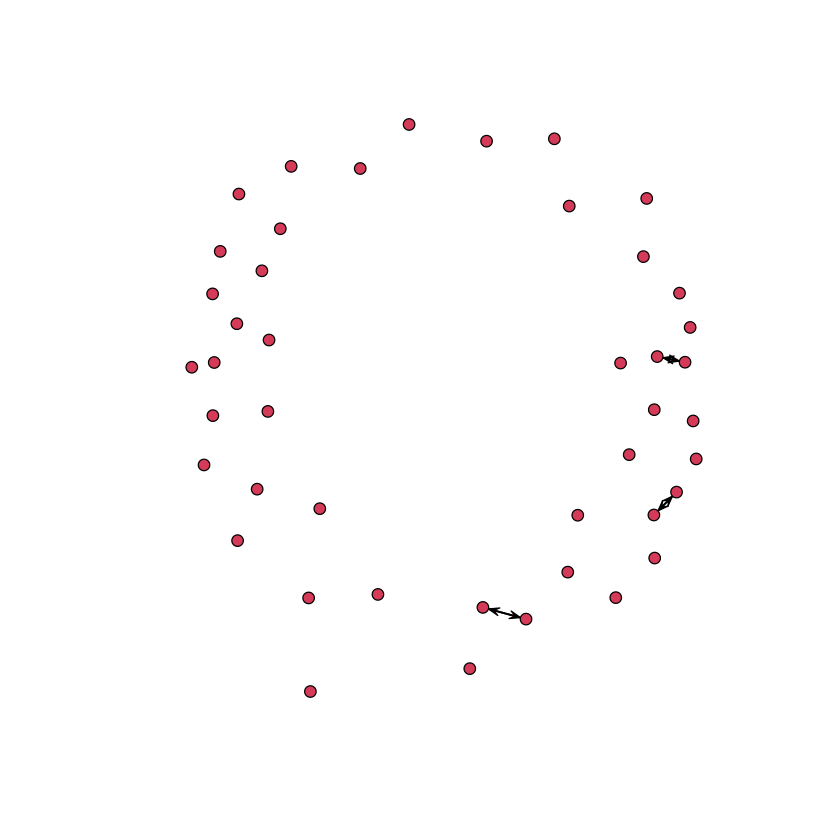

In [69]:
r.net = network(rgraph(n = 44, m = 1, mode = 'graph', tprob = 0.004))
par(bg = "white")
plot(r.net)
network.size(r.net)     # What is the network size?
network.edgecount(r.net)

### Network Measures

In [77]:
ga.atts$Degree = degree(grey.net, gmode = 'graph')
ga.atts$BetweenCent <- betweenness(grey.net, gmode="graph")
ga.atts$CloseCent <- closeness(grey.net, g=4, gmode="graph") 

In [80]:
head(ga.atts, 3)

,name,sex,race,birthyear,position,season,sign,Degree,BetweenCent,CloseCent
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,addison,F,White,1967,Attending,1,Libra,3,72.56667,0
2,adele,F,Black,1949,Non-Staff,2,Leo,1,0.00000,0
3,altman,F,White,1969,Attending,6,Pisces,4,153.00000,0


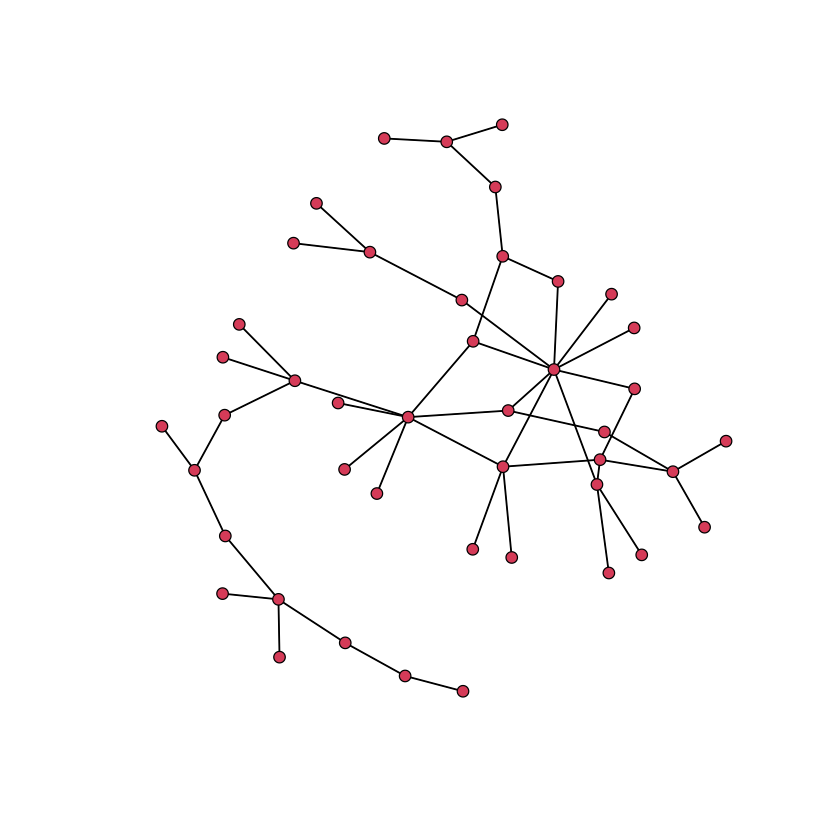

In [82]:
par(bg = 'white')
ga.mod<-as.matrix(read.table(('../datasets/grey/grey_adjacency_mod.tsv'), sep="\t",
                             header=T, row.names=1, quote="\""))

grey.net.mod<-network(ga.mod, vertex.attr=ga.atts, vertex.attrnames=colnames(ga.atts),
                  directed=F, hyper=F, loops=F, multiple=F, bipartite=F)

plot(grey.net.mod)

ga.atts$CloseCentMOD <- closeness(grey.net.mod, g=3, gmode="graph") 

In [83]:
ga.atts$evcent<-evcent(grey.net, gmode='graph', maxiter=500, use.eigen=TRUE)

In [85]:
gden(grey.net)

[1] 0.04862579

In [86]:
gtrans(grey.net)

[1] 0

In [87]:
triad.census(grey.net, mode="digraph")

003,012,102,021D,021U,021C,111D,111U,030T,030C,201,120D,120U,120C,210,300
11426,0,1704,0,0,0,0,0,0,0,114,0,0,0,0,0


In [88]:
grey.net.cliques <- clique.census(grey.net, mode = "graph", clique.comembership="sum")

In [90]:
grey.net.cliques$clique.count

# The second element is the clique co-membership matrix:

grey.net.cliques$clique.comemb


# The third element of the clique census result is a list of all found cliques:
# (Remember that a list can have another list as its element)

grey.net.cliques$cliques # a full list of cliques, all sizes

grey.net.cliques$cliques[[2]] # cliques of size 2

,Agg,addison,adele,altman,amelia,arizona,ava,avery,bailey,ben,⋯,pierce,preston,reed,sloan,steve,susan.grey,thatch.grey,torres,tucker,yang
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,46,3,1,4,1,1,1,2,3,1,⋯,1,1,1,7,1,1,2,5,1,3


,addison,adele,altman,amelia,arizona,ava,avery,bailey,ben,burton,⋯,pierce,preston,reed,sloan,steve,susan.grey,thatch.grey,torres,tucker,yang
addison,3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
adele,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
altman,0,0,4,0,0,0,0,0,0,1,⋯,0,0,0,1,0,0,0,0,0,0
amelia,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
arizona,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
ava,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
avery,0,0,0,0,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
bailey,0,0,0,0,0,0,0,3,1,0,⋯,0,0,0,0,0,0,0,0,1,0
ben,0,0,0,0,0,0,0,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
burton,0,0,1,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0


[[1]]
NULL

[[2]]
[[2]][[1]]
[1] 27 35

[[2]][[2]]
[1] 27 28

[[2]][[3]]
[1]  8 43

[[2]][[4]]
[1]  8 25

[[2]][[5]]
[1] 8 9

[[2]][[6]]
[1] 40 41

[[2]][[7]]
[1] 16 41

[[2]][[8]]
[1] 12 16

[[2]][[9]]
[1] 11 12

[[2]][[10]]
[1]  2 12

[[2]][[11]]
[1] 38 42

[[2]][[12]]
[1]  1 38

[[2]][[13]]
[1] 37 38

[[2]][[14]]
[1] 36 44

[[2]][[15]]
[1] 30 38

[[2]][[16]]
[1] 22 42

[[2]][[17]]
[1] 31 32

[[2]][[18]]
[1] 22 31

[[2]][[19]]
[1] 22 29

[[2]][[20]]
[1] 22 26

[[2]][[21]]
[1] 22 24

[[2]][[22]]
[1] 22 23

[[2]][[23]]
[1]  1 22

[[2]][[24]]
[1] 20 21

[[2]][[25]]
[1] 19 42

[[2]][[26]]
[1] 18 39

[[2]][[27]]
[1] 32 42

[[2]][[28]]
[1] 18 32

[[2]][[29]]
[1] 15 18

[[2]][[30]]
[1] 17 18

[[2]][[31]]
[1] 21 32

[[2]][[32]]
[1] 21 22

[[2]][[33]]
[1] 14 21

[[2]][[34]]
[1] 13 44

[[2]][[35]]
[1] 24 38

[[2]][[36]]
[1]  7 24

[[2]][[37]]
[1]  7 23

[[2]][[38]]
[1]  6 22

[[2]][[39]]
[1]  5 42

[[2]][[40]]
[1]  4 38

[[2]][[41]]
[1]  3 38

[[2]][[42]]
[1]  3 34

[[2]][[43]]
[1] 33 44

[[2]][[44]]
[1]  3 33

[[2]][[45]]
[1]  3 10

[[2]][[46]]
[1]  1 15

[[1]]
[1] 27 35

[[2]]
[1] 27 28

[[3]]
[1]  8 43

[[4]]
[1]  8 25

[[5]]
[1] 8 9

[[6]]
[1] 40 41

[[7]]
[1] 16 41

[[8]]
[1] 12 16

[[9]]
[1] 11 12

[[10]]
[1]  2 12

[[11]]
[1] 38 42

[[12]]
[1]  1 38

[[13]]
[1] 37 38

[[14]]
[1] 36 44

[[15]]
[1] 30 38

[[16]]
[1] 22 42

[[17]]
[1] 31 32

[[18]]
[1] 22 31

[[19]]
[1] 22 29

[[20]]
[1] 22 26

[[21]]
[1] 22 24

[[22]]
[1] 22 23

[[23]]
[1]  1 22

[[24]]
[1] 20 21

[[25]]
[1] 19 42

[[26]]
[1] 18 39

[[27]]
[1] 32 42

[[28]]
[1] 18 32

[[29]]
[1] 15 18

[[30]]
[1] 17 18

[[31]]
[1] 21 32

[[32]]
[1] 21 22

[[33]]
[1] 14 21

[[34]]
[1] 13 44

[[35]]
[1] 24 38

[[36]]
[1]  7 24

[[37]]
[1]  7 23

[[38]]
[1]  6 22

[[39]]
[1]  5 42

[[40]]
[1]  4 38

[[41]]
[1]  3 38

[[42]]
[1]  3 34

[[43]]
[1] 33 44

[[44]]
[1]  3 33

[[45]]
[1]  3 10

[[46]]
[1]  1 15

In [91]:
components(grey.net, connected="strong")
components(grey.net, connected="weak")

[1] 4

[1] 4

In [92]:
grey.comp <- component.dist(grey.net, connected="strong")
grey.comp

$membership
 [1] 1 2 1 1 1 1 1 3 3 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 3 1 4 4 1 1 1 1 1 1 4 1 1 1
[39] 1 2 2 1 3 1

$csize
[1] 31  6  4  3

$cdist
 [1] 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0

In [93]:
cutpoints(grey.net, connected="strong")

[1]  3  8 12 16 18 21 22 27 33 38 41 42 44

In [98]:
ga.atts[3, ]$name

[1] "altman"

[1] 7

[1] "matrix" "array"

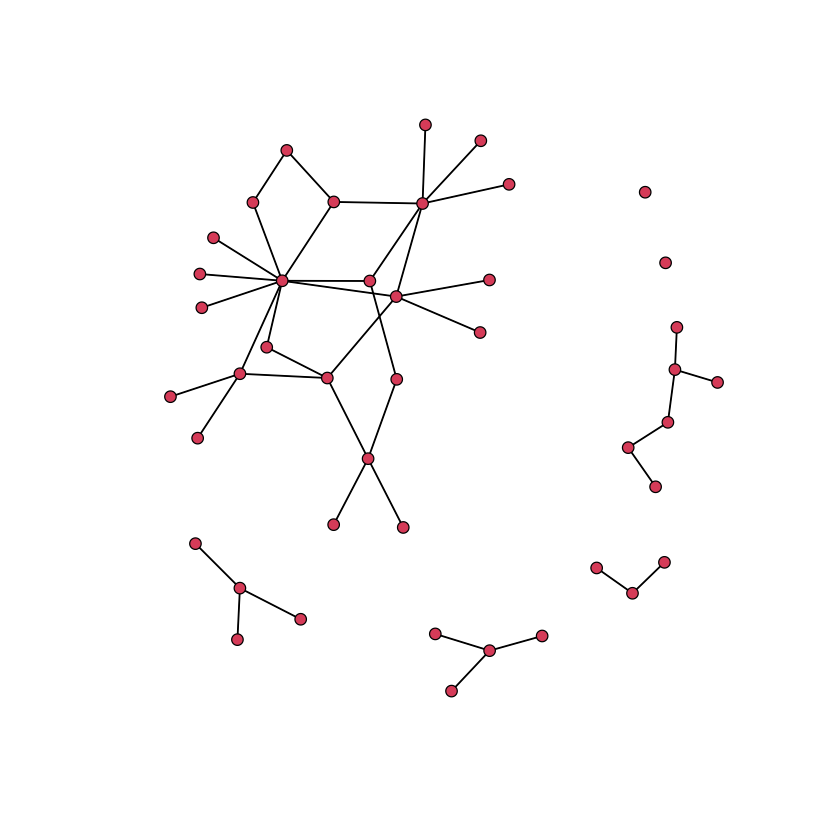

In [95]:
par(bg = 'white')
grey.net.cut <- grey.net[-3,-3]
components(grey.net.cut, connected="strong")

class(grey.net.cut)
grey.cut.net <- network(grey.net.cut, vertex.attr=ga.atts, vertex.attrnames=colnames(ga.atts),
        directed=F, hyper=F, loops=F, multiple=F, bipartite=F)
plot(grey.cut.net)

### ERGM 

In [101]:
install.packages("latticeExtra")
library(RCurl) 
library(ergm) 
library(latticeExtra)

also installing the dependencies 'png', 'jpeg'





The downloaded binary packages are in
	/var/folders/br/mm_jgp0n0bj3z5lzc2r4xd1r0000gn/T//RtmpIvmbtq/downloaded_packages


Loading required package: lattice



In [102]:
par(mfrow=c(1,1), bg = 'white')

In [103]:
summary(grey.net)

Network attributes:
  vertices = 44
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 46 
   missing edges = 0 
   non-missing edges = 46 
 density = 0.04862579 

Vertex attributes:

 birthyear:
   integer valued attribute
   44 values

 name:
   character valued attribute
   attribute summary:
   the 10 most common values are:
addison   adele  altman  amelia arizona     ava   avery  bailey     ben  burton 
      1       1       1       1       1       1       1       1       1       1 

 position:
   character valued attribute
   attribute summary:
Attending     Chief    Intern Non-Staff     Nurse     Other  Resident 
       14         2         3        12         2         2         9 

 race:
   character valued attribute
   attribute summary:
Black Other White 
    8     4    32 

 season:
   integer valued attribute
   44 values

 sex:
   character valued attribute
   attribute summary:
 F  M 
23 21 

 sign:
   character valu

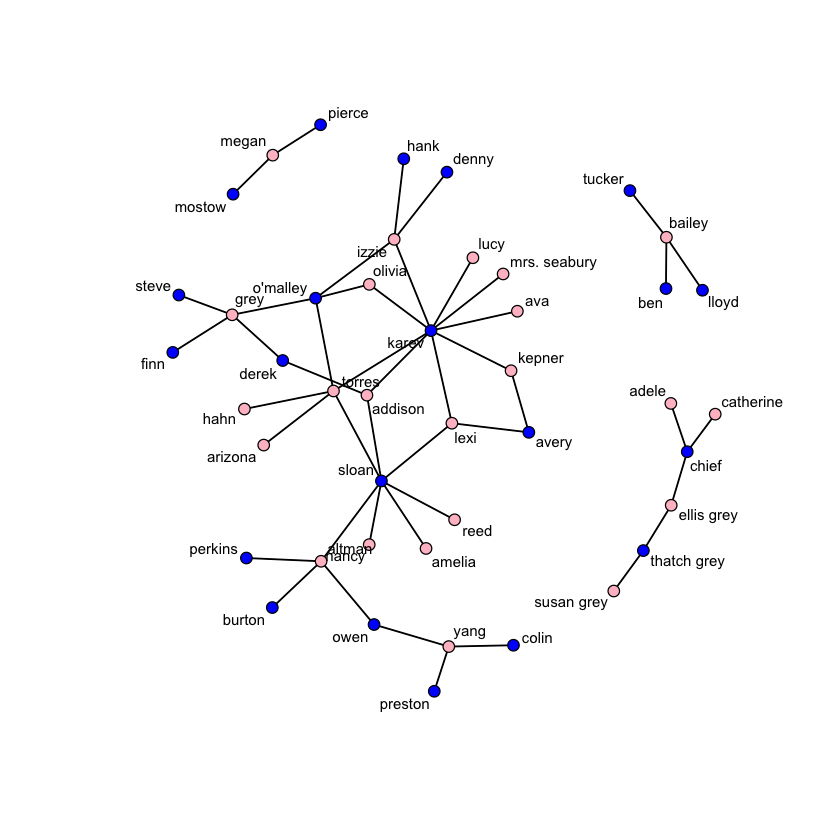

In [105]:
par(bg = 'white')
plot(grey.net, vertex.col=c("blue","pink")[1+(get.vertex.attribute(grey.net, "sex")=="F")],
     label=get.vertex.attribute(grey.net, "name"), label.cex=.75)

In [108]:
list.vertex.attributes(grey.net)

[1] "birthyear"    "na"           "name"         "position"     "race"        
[6] "season"       "sex"          "sign"         "vertex.names"

In [109]:
get.vertex.attribute(grey.net, 'name')

[1] "addison"      "adele"        "altman"       "amelia"       "arizona"     
 [6] "ava"          "avery"        "bailey"       "ben"          "burton"      
[11] "catherine"    "chief"        "colin"        "denny"        "derek"       
[16] "ellis grey"   "finn"         "grey"         "hahn"         "hank"        
[21] "izzie"        "karev"        "kepner"       "lexi"         "lloyd"       
[26] "lucy"         "megan"        "mostow"       "mrs. seabury" "nancy"       
[31] "olivia"       "o'malley"     "owen"         "perkins"      "pierce"      
[36] "preston"      "reed"         "sloan"        "steve"        "susan grey"  
[41] "thatch grey"  "torres"       "tucker"       "yang"

In [110]:
get.vertex.attribute(grey.net, 'birthyear')

[1] 1967 1949 1969 1981 1976 1975 1981 1969 1972 1972 1950 1954 1944 1966 1966
[16] 1957 1970 1969 1967 1975 1978 1970 1980 1982 1971 1984 1979 1985 1952 1965
[31] 1982 1973 1973 1965 1986 1963 1981 1972 1984 1959 1955 1975 1970 1971

In [113]:
grey.base <- ergm(grey.net~edges+nodematch("sex"))

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




In [115]:
summary(grey.base)

Call:
ergm(formula = grey.net ~ edges + nodematch("sex"))

Iterations:  6 out of 20 

Monte Carlo MLE Results:
              Estimate Std. Error MCMC % z value Pr(>|z|)    
edges          -2.3003     0.1581      0 -14.547   <1e-04 ***
nodematch.sex  -3.1399     0.7260      0  -4.325   <1e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 1311.4  on 946  degrees of freedom
 Residual Deviance:  320.5  on 944  degrees of freedom
 
AIC: 324.5    BIC: 334.2    (Smaller is better.) 

### Generating a random model based on the captured aspects of the observed graph

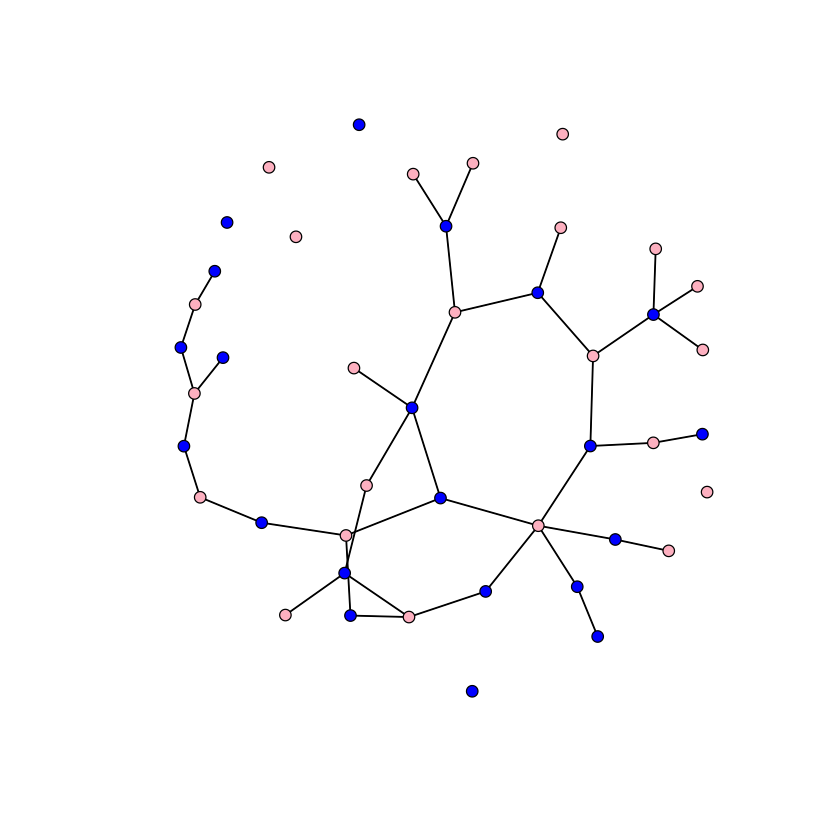

In [123]:
par(bg = 'white')
plot(simulate(grey.base),
     vertex.col=c("blue","pink")[ 1+(get.vertex.attribute(grey.net, "sex")=="F")])

In [124]:
grey.base.gof <- gof(grey.base)

In [125]:
summary(grey.base.gof) #Summarize the goodness of fit

               Length Class   Mode   
network.size      1   -none-  numeric
GOF               2   formula call   
pval.model       10   -none-  numeric
summary.model    10   -none-  numeric
pobs.model        2   -none-  numeric
psim.model      200   -none-  numeric
bds.model         4   -none-  numeric
obs.model         2   -none-  numeric
sim.model       200   -none-  numeric
pval.dist       220   -none-  numeric
summary.dist    220   -none-  numeric
pobs.dist        44   -none-  numeric
psim.dist      4400   -none-  numeric
bds.dist         88   -none-  numeric
obs.dist         44   -none-  numeric
sim.dist       4400   -none-  numeric
pval.deg        220   -none-  numeric
summary.deg     220   -none-  numeric
pobs.deg         44   -none-  numeric
psim.deg       4400   -none-  numeric
bds.deg          88   -none-  numeric
obs.deg          44   -none-  numeric
sim.deg        4400   -none-  numeric
pval.espart     215   -none-  numeric
summary.espart  215   -none-  numeric
pobs.espart 

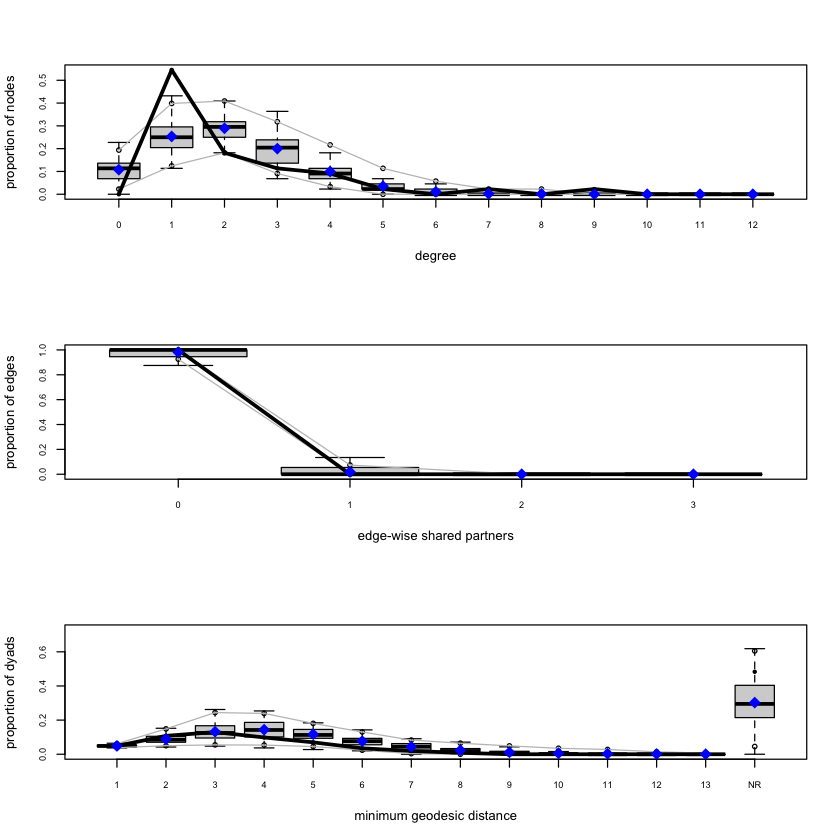

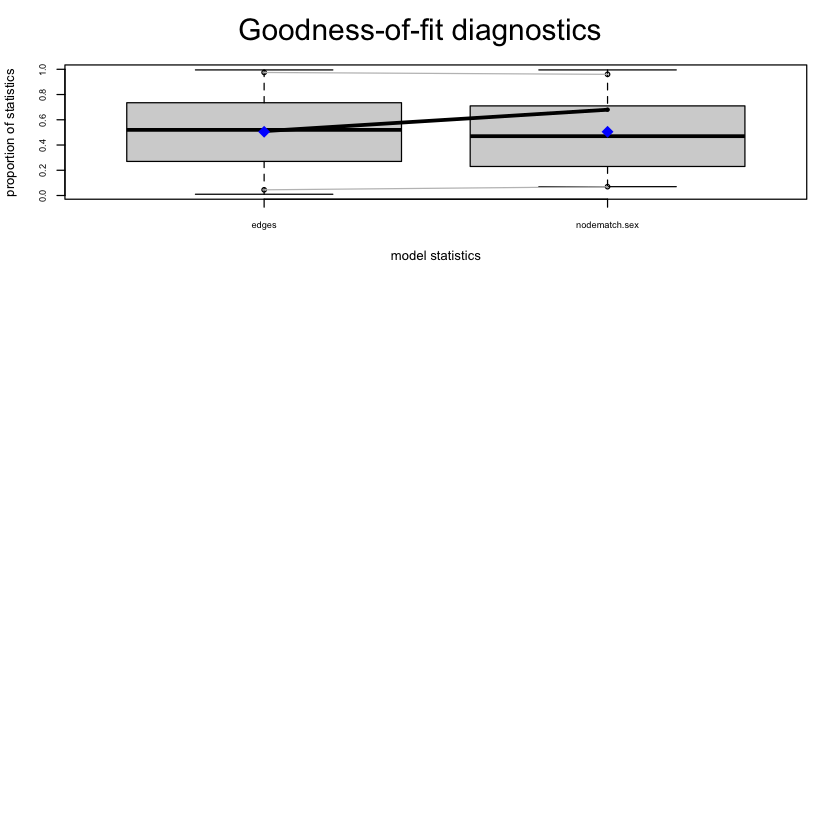

In [127]:
par(mfrow=c(3,1), bg = 'white')
plot(grey.base.gof)

In [128]:
grey.base.d1 <- ergm(grey.net~edges+nodematch("sex")+degree(1))

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.4274.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.1501.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



In [129]:
summary(grey.base.d1)

Call:
ergm(formula = grey.net ~ edges + nodematch("sex") + degree(1))

Iterations:  2 out of 20 

Monte Carlo MLE Results:
              Estimate Std. Error MCMC % z value Pr(>|z|)    
edges          -1.4037     0.2180      0  -6.440   <1e-04 ***
nodematch.sex  -3.1450     0.6932      0  -4.537   <1e-04 ***
degree1         2.1014     0.4619      0   4.549   <1e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 1311.4  on 946  degrees of freedom
 Residual Deviance:  295.6  on 943  degrees of freedom
 
AIC: 301.6    BIC: 316.1    (Smaller is better.) 

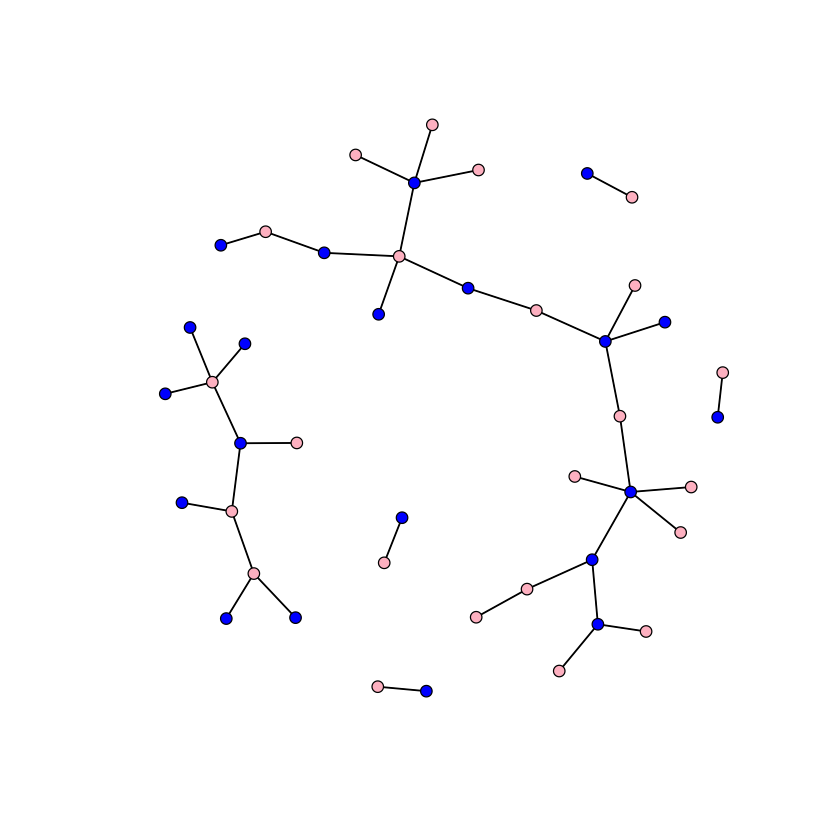

In [130]:
par(mfrow=c(1,1), bg = 'white') 
plot(simulate(grey.base.d1),
     vertex.col=c("blue","pink")[1+(get.vertex.attribute(grey.net, "sex")=="F")])

               Length Class   Mode   
network.size      1   -none-  numeric
GOF               2   formula call   
pval.model       15   -none-  numeric
summary.model    15   -none-  numeric
pobs.model        3   -none-  numeric
psim.model      300   -none-  numeric
bds.model         6   -none-  numeric
obs.model         3   -none-  numeric
sim.model       300   -none-  numeric
pval.dist       220   -none-  numeric
summary.dist    220   -none-  numeric
pobs.dist        44   -none-  numeric
psim.dist      4400   -none-  numeric
bds.dist         88   -none-  numeric
obs.dist         44   -none-  numeric
sim.dist       4400   -none-  numeric
pval.deg        220   -none-  numeric
summary.deg     220   -none-  numeric
pobs.deg         44   -none-  numeric
psim.deg       4400   -none-  numeric
bds.deg          88   -none-  numeric
obs.deg          44   -none-  numeric
sim.deg        4400   -none-  numeric
pval.espart     215   -none-  numeric
summary.espart  215   -none-  numeric
pobs.espart 

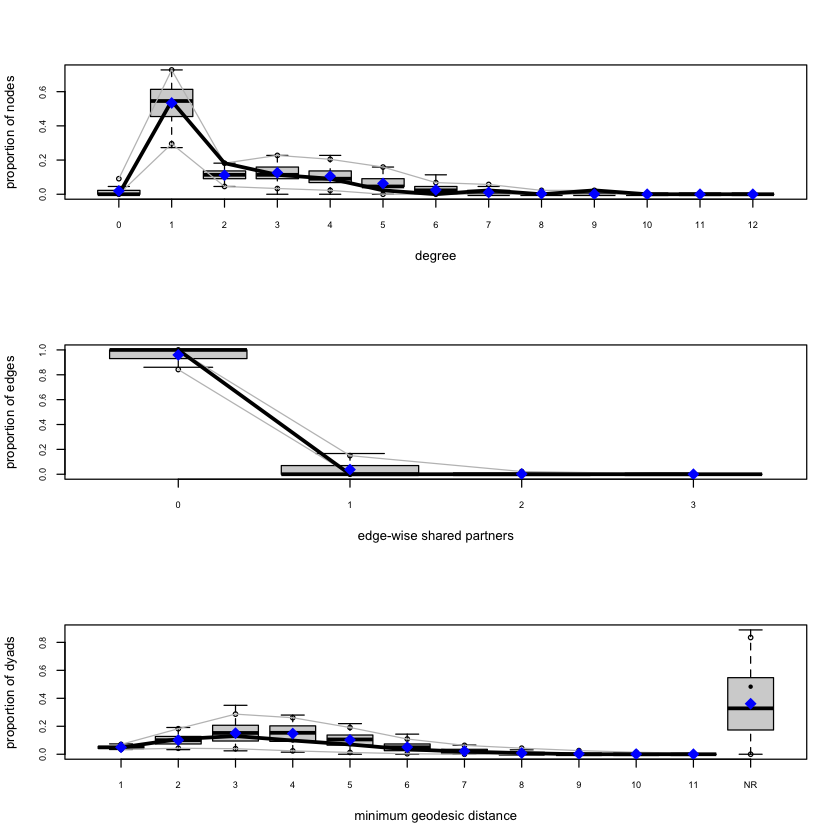

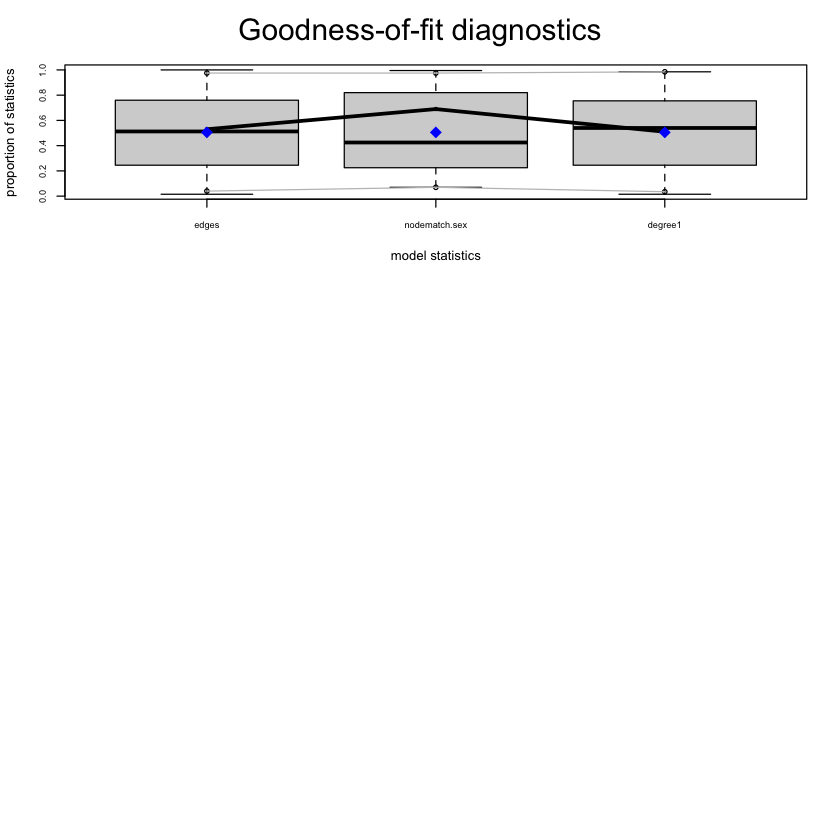

In [131]:
grey.base.d1.gof <- gof(grey.base.d1)
summary(grey.base.d1.gof)

par(mfrow=c(3,1), bg = 'white')
plot(grey.base.d1.gof)

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                 Mean     SD Naive SE Time-series SE
edges          5.5171 11.461  0.17907        0.30507
nodematch.sex  0.2939  1.559  0.02436        0.02605
degree1       -1.7715  5.317  0.08308        0.13304

2. Quantiles for each variable:

              2.5% 25% 50% 75% 97.5%
edges          -12  -3   4  12    32
nodematch.sex   -2  -1   0   1     4
degree1        -13  -5  -2   2     8


Sample statistics cross-correlations:
                   edges nodematch.sex    degree1
edges          1.0000000     0.3783647 -0.9133012
nodematch.sex  0.3783647     1.0000000 -0.3371137
degree1       -0.9133012    -0.3371137  1.0000000

Sample statistics auto-correlation:
Chain 1 
              edges nodematch.sex    degree1
Lag 0    1.00000000   1.000000000 1.00000000

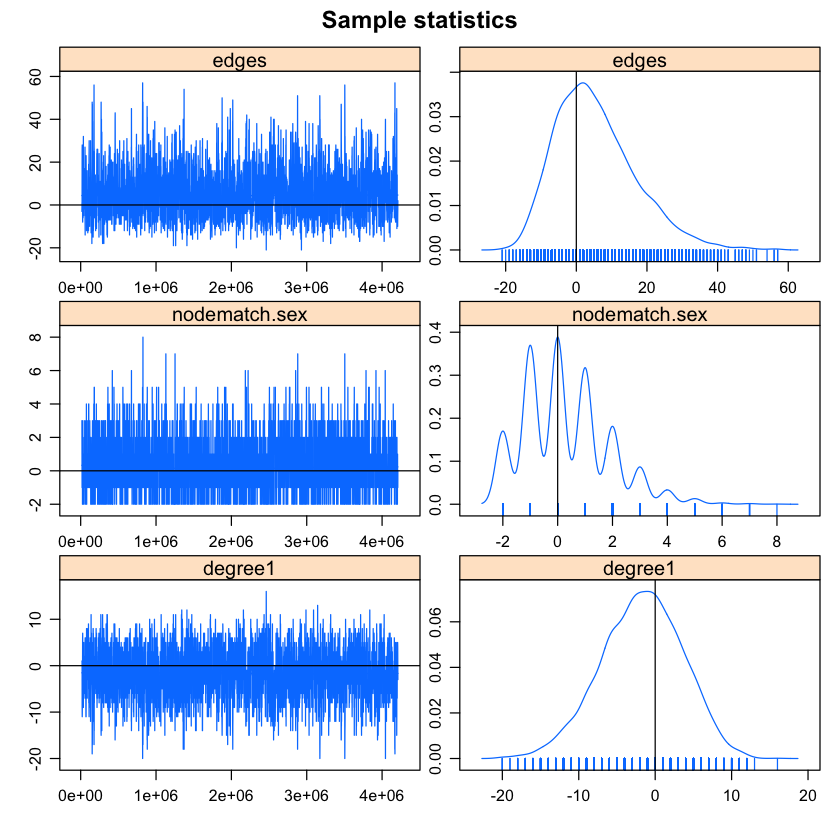

In [132]:
mcmc.diagnostics(grey.base.d1)